Create Player Ratings

In [2]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from player_ratings import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

In [5]:
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/data/player_stats.csv")
player_stats['Season'] = player_stats['Match_ID'].apply(lambda x: int(x[:4]))
player_stats['Player_Season'] = player_stats['Player'] + "_" + player_stats['Season'].astype(str)

player_stats['Score'] = player_stats['Behinds'] + player_stats['Goals']*6
player_stats['xScore_Diff'] = player_stats['Score'] - player_stats['xScore']

player_stats.head()

,Match_ID,Team,Player,Round_ID,AFL_API_Player_ID,Player_Type,playerId,Age,Height,Weight,Number,Kicking_Foot,State_Of_Origin,Draft_Year,Debut_Year,Recruited_From,Draft_Position,Draft_Type,Photo_URL,Date_Of_Birth,Percent_Played,Behinds,Bounces,Centre_Bounces_Attended,Centre_Clearances,Clangers,Defensive_Contest_Losses,Defensive_Contest_Loss_Percentage,Defensive_One_On_One_Contests,Contested_Marks,Contested_Possession_Rate,Contested_Possessions,Offensive_One_On_One_Contests,Offensive_Contest_Wins,Offensive_Contest_Win_Percentage,Defensive_Half_Pressure_Acts,Disposal_Efficiency,Disposals,AFL_Fantasy_Points,Effective_Disposals,Effective_Kicks,Inside_50_Ground_Ball_Gets,Frees_Against,Frees_For,Goal_Accuracy,Goal_Assists,Goals,Ground_Ball_Gets,Handballs,Hit_Outs,Hit_Outs_To_Advantage,Hit_Outs_To_Advantage_Rate,Hit_Out_Win_Percentage,Inside_50s,Intercept_Marks,Intercepts,Kick_Efficiency,Kick_Ins,Kick_Ins_Played_On,Kicks,Kick_To_Handball_Ratio,Marks,Marks_Inside_50,Marks_On_Lead,Metres_Gained,One_Percenters,Pressure_Acts,Player_Rating_Points,Rebound_50s,Ruck_Contests,Score_Involvements,Score_Launches,Shots_At_Goal,Spoils,Stoppage_Clearances,Tackles,Tackles_Inside_50,Clearances,Possessions,Turnovers,Uncontested_Possessions,AFLCA_Player_ID,Coaches_Votes,Position,Team_Status,Position_Sub_Group,Position_Group,Year,Brownlow_Votes,Season,xScore,xT_created,xT_denied,vaep_value,offensive_value,defensive_value,exp_vaep_value,exp_offensive_value,exp_defensive_value,xT_received,xT_prevented,vaep_value_received,exp_vaep_value_received,Player_Season,Score,xScore_Diff
0,202101_BrisbaneLions_Sydney,Brisbane Lions,Brandon Starcevich,202101,Brandon_Starcevich,MEDIUM_DEFENDER,CD_I1002401,22,187,92,37,RIGHT,WA,2017.0,2018.0,Mt Lawley-Inglewood (WA)/Trinity Coll (WA)/Eas...,18.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1999-07-24,84,0,1.0,0.0,0,1,1.0,100.0,1.0,1,55.6,5,0.0,0.0,0.0,4.0,88.9,9,31,8.0,5.0,0.0,0,1,0.0,0,0,3.0,3,0,0.0,0.0,0.0,0,1.0,4,83.3,0.0,0.0,6,2.0,2,0,1.0,172.0,1,5.0,6.1,2,0.0,4,1.0,0,1.0,1,0,0,1,9,2,4,NaN,NaN,Half Back Flank Left,FINAL_TEAM,Half-Back,Back,2021.0,0.0,2021,0.000000,-0.235667,0.000000,0.711460,0.026457,0.685004,3.362637,0.585132,2.777505,-0.461340,0.190552,0.329877,2.328707,Brandon Starcevich_2021,0,0.000000
1,202101_BrisbaneLions_Sydney,Brisbane Lions,Callum Ah Chee,202101,Callum_Ah_Chee,MEDIUM_DEFENDER,CD_I298437,24,183,79,4,RIGHT,WA,2015.0,2016.0,Kelmscott (WA)/South Fremantle (WAFL)/Gold Coast,8.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1997-10-09,87,0,0.0,0.0,0,4,1.0,100.0,1.0,0,66.7,8,0.0,0.0,0.0,5.0,83.3,12,36,10.0,5.0,0.0,2,0,0.0,1,0,8.0,6,0,0.0,0.0,0.0,2,0.0,7,83.3,1.0,1.0,6,1.0,0,0,0.0,258.0,2,7.0,8.0,1,0.0,2,1.0,0,2.0,0,3,1,0,12,6,4,NaN,NaN,Interchange,FINAL_TEAM,Interchange,Interchange,2021.0,0.0,2021,0.000000,-0.075963,0.010892,0.291451,0.479986,-0.188535,1.318957,1.031427,0.287530,-0.487945,-0.039690,0.608221,3.269039,Callum Ah Chee_2021,0,0.000000
2,202101_BrisbaneLions_Sydney,Brisbane Lions,Charlie Cameron,202101,Charlie_Cameron,MEDIUM_FORWARD,CD_I990609,27,180,75,23,RIGHT,WA,2014.0,2014.0,Newman Saints (WA)/Swan Districts (WAFL)/Adelaide,NaN,rookieElevation,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1994-07-05,77,0,0.0,9.0,3,0,0.0,0.0,0.0,0,50.0,5,0.0,0.0,0.0,3.0,70.0,10,39,7.0,4.0,0.0,0,2,0.0,1,0,1.0,3,0,0.0,0.0,0.0,3,0.0,1,57.1,0.0,0.0,7,2.3,2,1,2.0,207.0,1,9.0,10.1,0,0.0,4,1.0,0,0.0,0,1,0,3,10,0,5,NaN,NaN,Forward Pocket Right,FINAL_TEAM,Forward-Pocket,Forward,2021.0,0.0,2021,0.000000,0.460322,-0.166355,0.696752,0.681301,0.015451,6.034727,5.882581,0.152147,0.197894,-0.035491,0.859897,8.186274,Charlie Cameron_2021,0,0.000000
3,202101_BrisbaneLions_Sydney,Brisbane Lions,Daniel Rich,202101,Daniel_Rich,MEDIUM_DEFENDER,CD_I271072,31,183,95,10,LEFT,WA,2008.0,2009.0,Sorrento-Duncraig (WA)/Subiaco (WAFL),7.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1990-06-07,84,0,0.0,0.0,0,4,1.0,50.0,2.0,0,12.5,2,0.0,0.0,0.0,5.0,60.9,23,95,14.0,12.0,0.0

In [6]:
player_stats[['Position_Group', 'Position_Sub_Group']].value_counts().sort_index()

Position_Group  Position_Sub_Group
Back            Back-Pocket           2249
                Half-Back             2231
                Key-Back              2246
Forward         Forward-Pocket        2233
                Half-Forward          2208
                Key-Forward           2247
Interchange     Interchange           5463
Midfield        Centre                3354
                Wing                  2191
Ruck            Ruck                  1148
dtype: int64

In [7]:
SELECTED_POSITION = "Centre"

position_role_stats = {
    'ball_progression' : [
        'Effective_Disposals',
        'Effective_Kicks',
        'Inside_50s',
        'Metres_Gained',
        'xT_created',
        'vaep_value',
        'offensive_value',
        'exp_vaep_value',
        'exp_offensive_value',
    ],
    'ball_denial' : [
        'Rebound_50s',
        'xT_prevented',
        'defensive_value',
        'exp_defensive_value'
    ],
    'contest' : [
        'Centre_Clearances',
        'Contested_Marks',
        'Contested_Possessions',
        'Ground_Ball_Gets',
        'Intercepts',
        'Pressure_Acts',
        'Stoppage_Clearances',
        'Tackles',
        'Clearances',
        'Possessions',
        'Uncontested_Possessions'
    ]}

In [8]:
position_summary, position_role_stats_zscaled = create_position_summary(player_stats, SELECTED_POSITION, position_role_stats)
selected_position_rating = get_selected_position_rating(SELECTED_POSITION)
position_summary.sort_values(by=selected_position_rating, ascending=False).head(10)

,,,Games,Age,Height,Weight,Debut_Year,Draft_Position,Pressure_Acts_sum,Ground_Ball_Gets_sum,Rebound_50s_sum,exp_defensive_value_sum,Contested_Marks_sum,exp_offensive_value_sum,xT_created_sum,exp_vaep_value_sum,Uncontested_Possessions_sum,Effective_Kicks_sum,vaep_value_sum,Centre_Clearances_sum,Intercepts_sum,defensive_value_sum,Possessions_sum,xT_prevented_sum,Metres_Gained_sum,offensive_value_sum,Tackles_sum,Clearances_sum,Effective_Disposals_sum,Inside_50s_sum,Stoppage_Clearances_sum,Contested_Possessions_sum,Percent_Played_sum,Pressure_Acts_pergame,Pressure_Acts_per100,Ground_Ball_Gets_pergame,Ground_Ball_Gets_per100,Rebound_50s_pergame,Rebound_50s_per100,exp_defensive_value_pergame,exp_defensive_value_per100,Contested_Marks_pergame,Contested_Marks_per100,exp_offensive_value_pergame,exp_offensive_value_per100,xT_created_pergame,xT_created_per100,exp_vaep_value_pergame,exp_vaep_value_per100,Uncontested_Possessions_pergame,Uncontested_Possessions_per100,Effective_Kicks_pergame,Effective_Kicks_per100,vaep_value_pergame,vaep_value_per100,Centre_Clearances_pergame,Centre_Clearances_per100,Intercepts_pergame,Intercepts_per100,defensive_value_pergame,defensive_value_per100,Possessions_pergame,Possessions_per100,xT_prevented_pergame,xT_prevented_per100,Metres_Gained_pergame,Metres_Gained_per100,offensive_value_pergame,offensive_value_per100,Tackles_pergame,Tackles_per100,Clearances_pergame,Clearances_per100,Effective_Disposals_pergame,Effective_Disposals_per100,Inside_50s_pergame,Inside_50s_per100,Stoppage_Clearances_pergame,Stoppage_Clearances_per100,Contested_Possessions_pergame,Contested_Possessions_per100,Pressure_Acts_per100_z,Ground_Ball_Gets_per100_z,Rebound_50s_per100_z,exp_defensive_value_per100_z,Contested_Marks_per100_z,exp_offensive_value_per100_z,xT_created_per100_z,exp_vaep_value_per100_z,Uncontested_Possessions_per100_z,Effective_Kicks_per100_z,vaep_value_per100_z,Centre_Clearances_per100_z,Intercepts_per100_z,defensive_value_per100_z,Possessions_per100_z,xT_prevented_per100_z,Metres_Gained_per100_z,offensive_value_per100_z,Tackles_per100_z,Clearances_per100_z,Effective_Disposals_per100_z,Inside_50s_per100_z,Stoppage_Clearances_per100_z,Contested_Possessions_per100_z,ball_progression_rating,ball_denial_rating,contest_rating,centre_rating
Player,Team,Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Marcus Bontempelli,Western Bulldogs,2023,20,27.000000,194.0,96.0,2014.0,4.0,480.0,161.0,34,14.214985,13,209.143882,4.019589,223.358867,293,177.0,30.053261,65,69,2.585517,579,0.608291,9405.0,27.467744,144,151,348.0,115,86,286,1694,24.000000,28.335301,8.050000,9.504132,1.700000,2.007084,0.710749,0.839137,0.650000,0.767414,10.457194,12.346156,0.200979,0.237284,11.167943,13.185293,14.650000,17.296340,8.850000,10.448642,1.502663,1.774100,3.250000,3.837072,3.450000,4.073200,0.129276,0.152628,28.950000,34.179457,0.030415,0.035909,470.250000,555.194805,1.373387,1.621472,7.200000,8.500590,7.550000,8.913813,17.400000,20.543093,5.750000,6.788666,4.300000,5.076741,14.300000,16.883117,0.728692,0.270754,0.123706,0.785748,2.128267,1.695746,-0.443732,1.863918,-0.188054,0.823173,1.673452,1.182153,0.535456,1.331077,0.480060,0.458347,1.356234,1.322811,1.360120,1.340186,-0.152851,1.297040,1.193465,1.025756,1.048421,0.674720,0.914259,0.879133
Rory Laird,Adelaide,2022,20,28.000000,178.0,78.0,2013.0,86.0,425.0,182.0,40,4.021483,0,172.982065,4.228516,177.003547,361,145.0,27.289030,61,86,1.673047,661,0.279449,7713.0,25.615983,162,150,427.0,93,89,300,1569,21.250000,27.087317,9.100000,11.599745,2.000000,2.549395,0.201074,0.256309,0.000000,0.000000,8.649103,11.024988,0.211426,0.269504,8.850177,11.281297,18.050000,23.008286,7.250000,9.241555,1.364451,1.739263,3.050000,3.887827,4.300000,5.481198,0.083652,0.106631,33.050000,42.128744,0.013972,0.017811,385.650000,491.586998,1.280799,1.632631,8.100000,10.325048,7.500000,9.560229,21.350000,27.214786,4.650000,5.927342,4.450000,5.672403,15.00000

In [9]:
players = create_player_rating_by_season(position_summary, SELECTED_POSITION, position_role_stats_zscaled)
players.sort_values(by='overall_'+selected_position_rating, ascending=False).head(20)

centre_rating                      \
Season                                        2021      2022      2023   
Player              Team                                                 
Rory Laird          Adelaide              0.599575  0.861111  0.546824   
Marcus Bontempelli  Western Bulldogs      0.231712  0.237611  0.879133   
Tom Liberatore      Western Bulldogs      0.447010  0.000000  0.699981   
Luke Davies-Uniacke North Melbourne      -0.266130  0.596319  0.429769   
Zak Butters         Port Adelaide         0.000000 -0.414446  0.846018   
Adam Cerra          Carlton               0.000000 -0.450494  0.855797   
Caleb Serong        Fremantle            -0.401044  0.137992  0.581940   
Noah Anderson       Gold Coast            0.000000  0.322055  0.413575   
Darcy Parish        Essendon              0.672833  0.028539  0.409449   
Zach Merrett        Essendon              0.607745  0.380583  0.235683   
Clayton Oliver      Melbourne             0.541174  0.655480  0.000000   
Jack Macrae         Western Bulldogs      0.827156  0.508999  0.000000   
Jarryd Lyons        Brisbane Lions        0.399173  0.475426  0.000000   
Will Brodie         Fremantle             0.000000  0.505318  0.000000   
Lachie Neale        Brisbane Lions        0.149698  0.122157  0.162356   
Jack Steele         St Kilda              0.486708 -0.021861  0.168482   
Ollie Wines         Port Adelaide         0.718992  0.207742  0.000000   
Jordan Dawson       Adelaide              0.000000  0.000000  0.213238   
Christian Petracca  Melbourne            -0.047404 -0.149627  0.232893   
Touk Miller         Gold Coast            0.336903  0.122819  0.000000   

                                     overall_centre_rating  
Season                                                      
Player              Team                                    
Rory Laird          Adelaide                      0.646385  
Marcus Bontempelli  Western Bulldogs              0.621935  
Tom Liberatore      Western Bulldogs              0.464690  
Luke Davies-Uniacke North Melbourne               0.410144  
Zak Butters         Port Adelaide                 0.383277  
Adam Cerra          Carlton                       0.378330  
Caleb Serong        Fremantle                     0.350457  
Noah Anderson       Gold Coast                    0.344761  
Darcy Parish        Essendon                      0.321514  
Zach Merrett        Essendon                      0.316359  
Clayton Oliver      Melbourne                     0.250761  
Jack Macrae         Western Bulldogs              0.235415  
Jarryd Lyons        Brisbane Lions                0.182545  
Will Brodie         Fremantle                     0.151595  
Lachie Neale        Brisbane Lions                0.149030  
Jack Steele         St Kilda                      0.143202  
Ollie Wines         Port Adelaide                 0.134222  
Jordan Dawson       Adelaide                      0.127943  
Christian Petracca  Melbourne                     0.090107  
Touk Miller         Gold Coast                    0.070536

Visualise

In [9]:
# display_histograms(position_summary, nrows=9, ncols=4, stats=position_stats_zscaled)

In [13]:
roles = list(position_role_stats_zscaled.keys())
role_ratings = [x+"_rating" for x in roles]
stats_list = []
for role in roles:
    stats_list.append([role+"_rating"] + position_role_stats_zscaled[role]) 

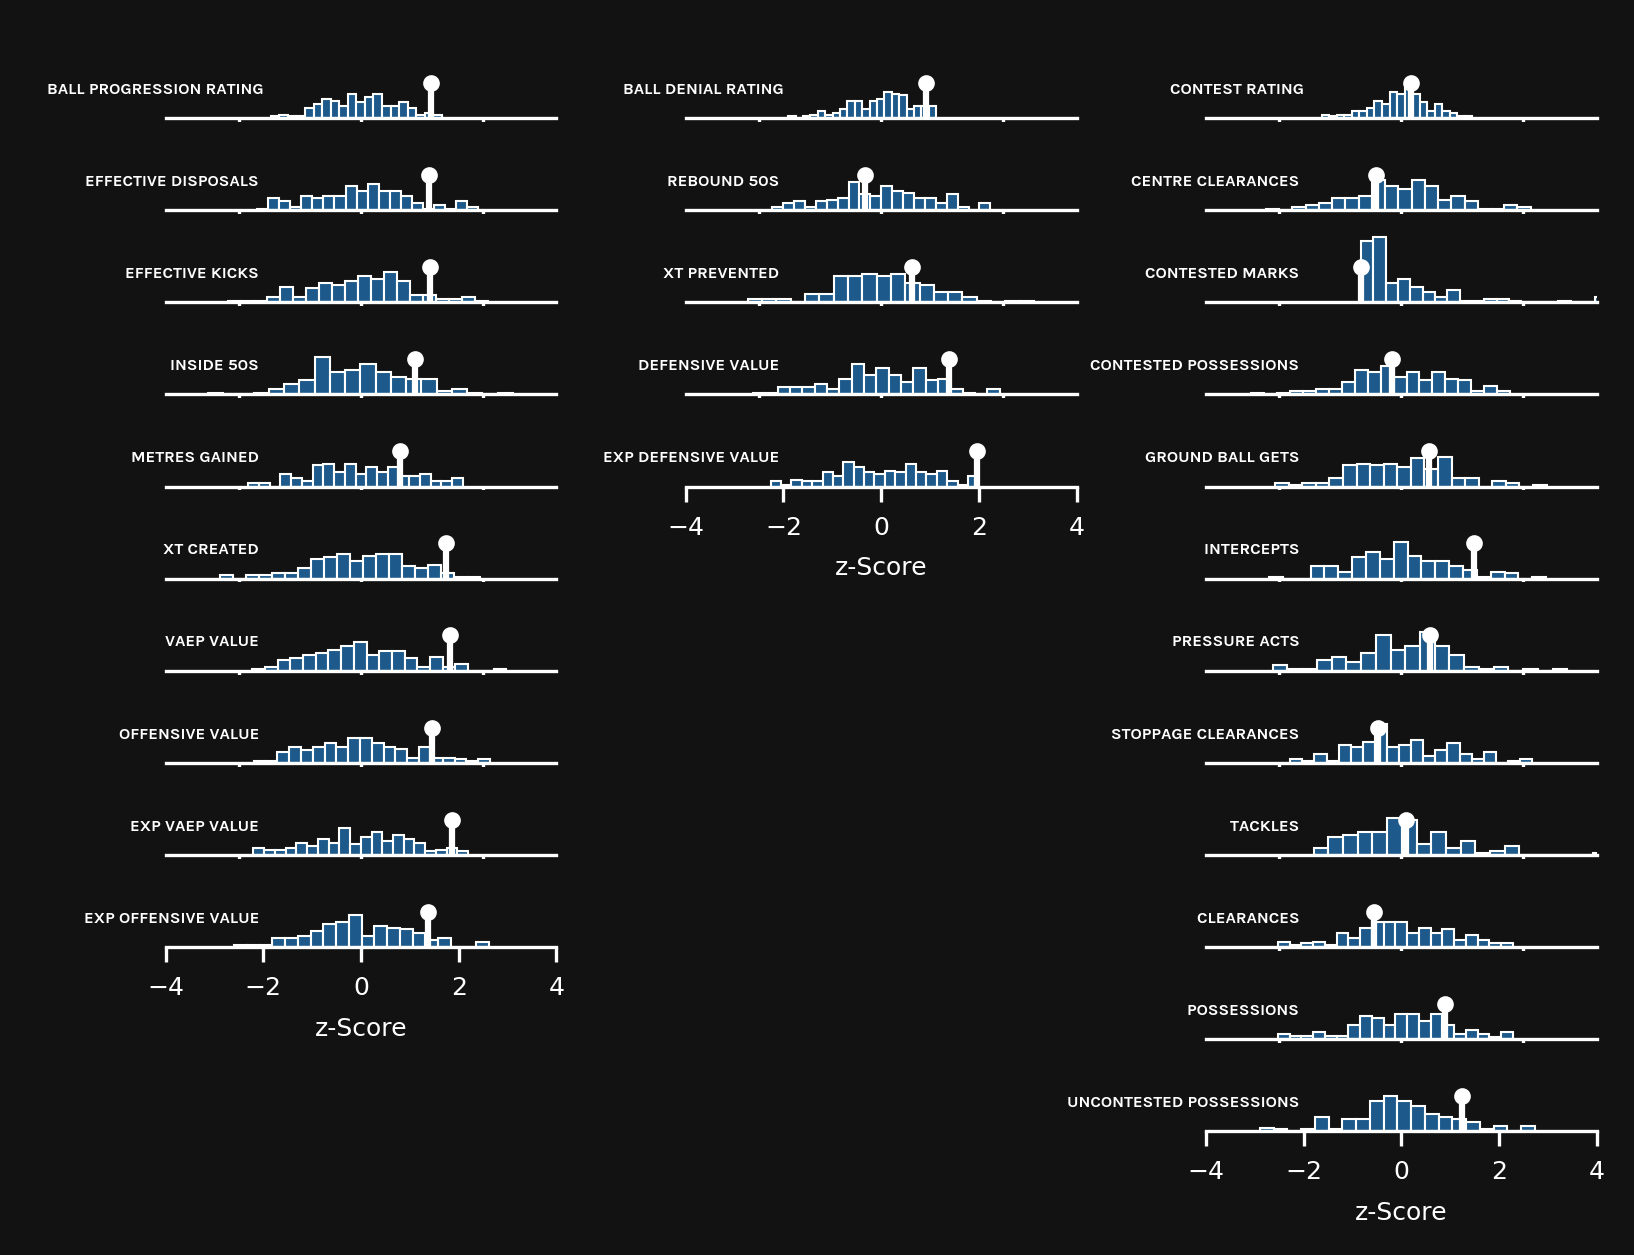

In [14]:
player = "Adam Cerra"
team = "Carlton"
season = 2023

fig, axs = plot_multiple_role_histograms(position_summary, stats_list, player, team, season, xlim=4, ylim = 50)

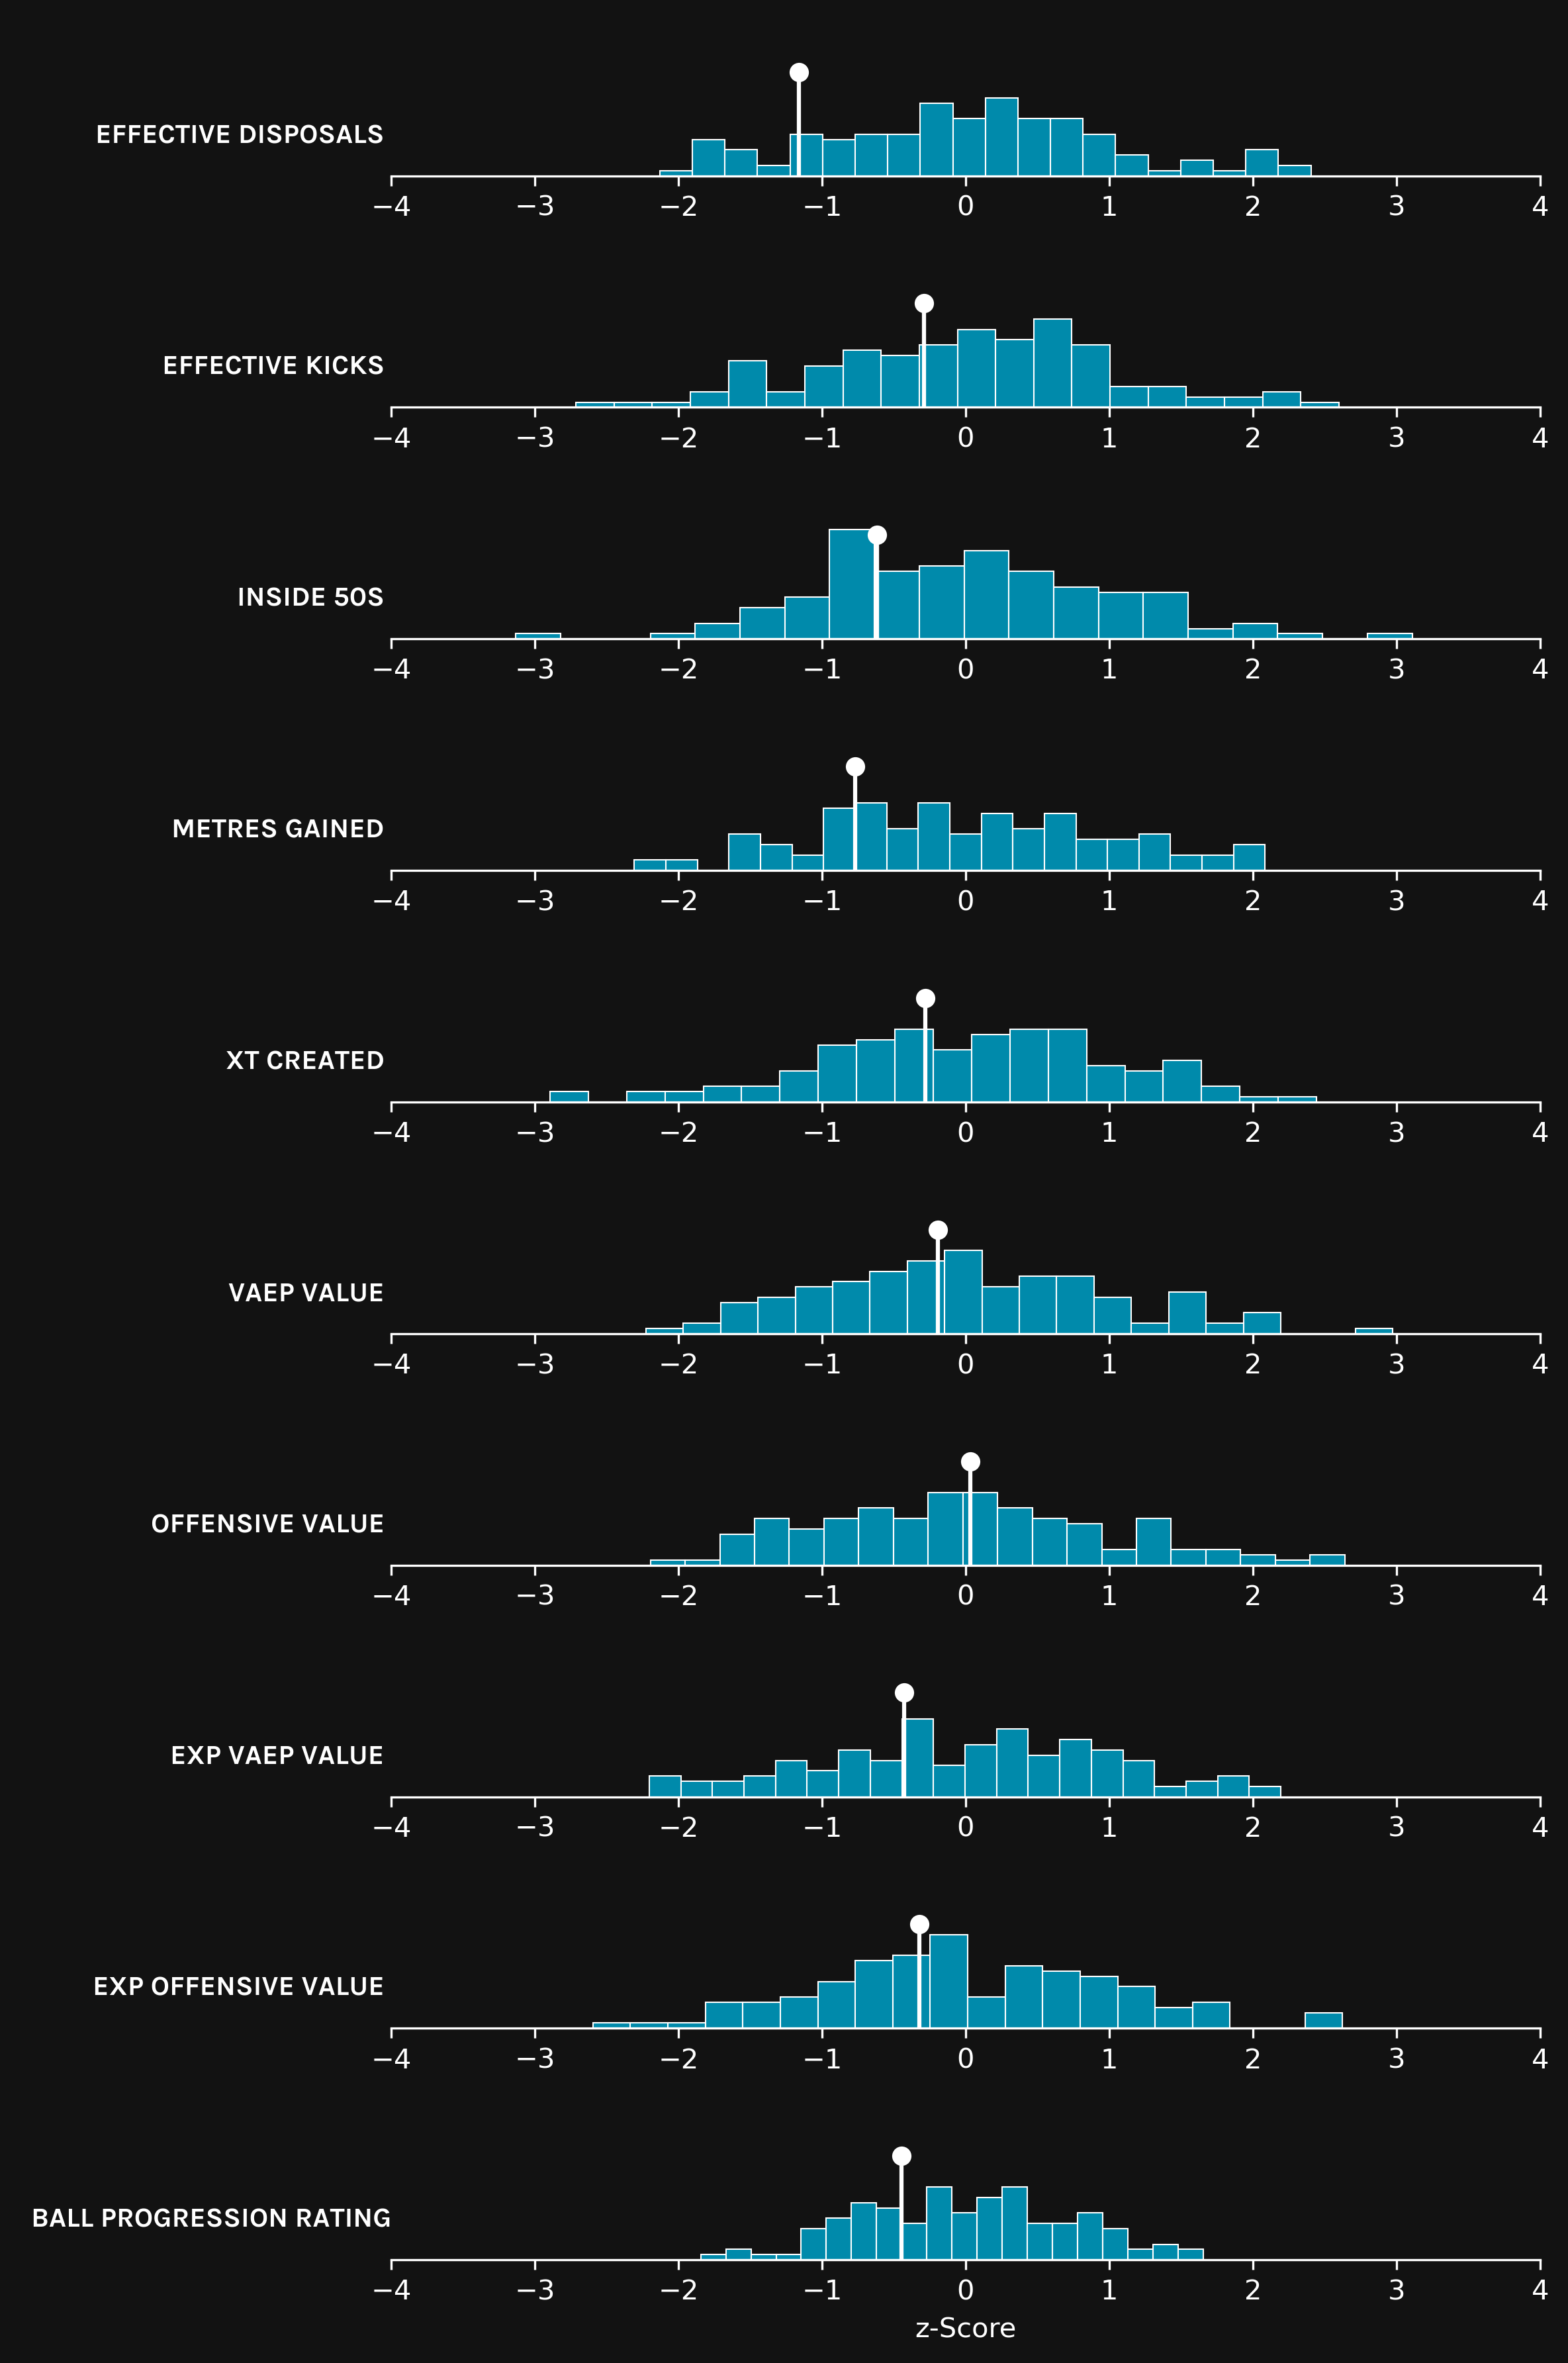

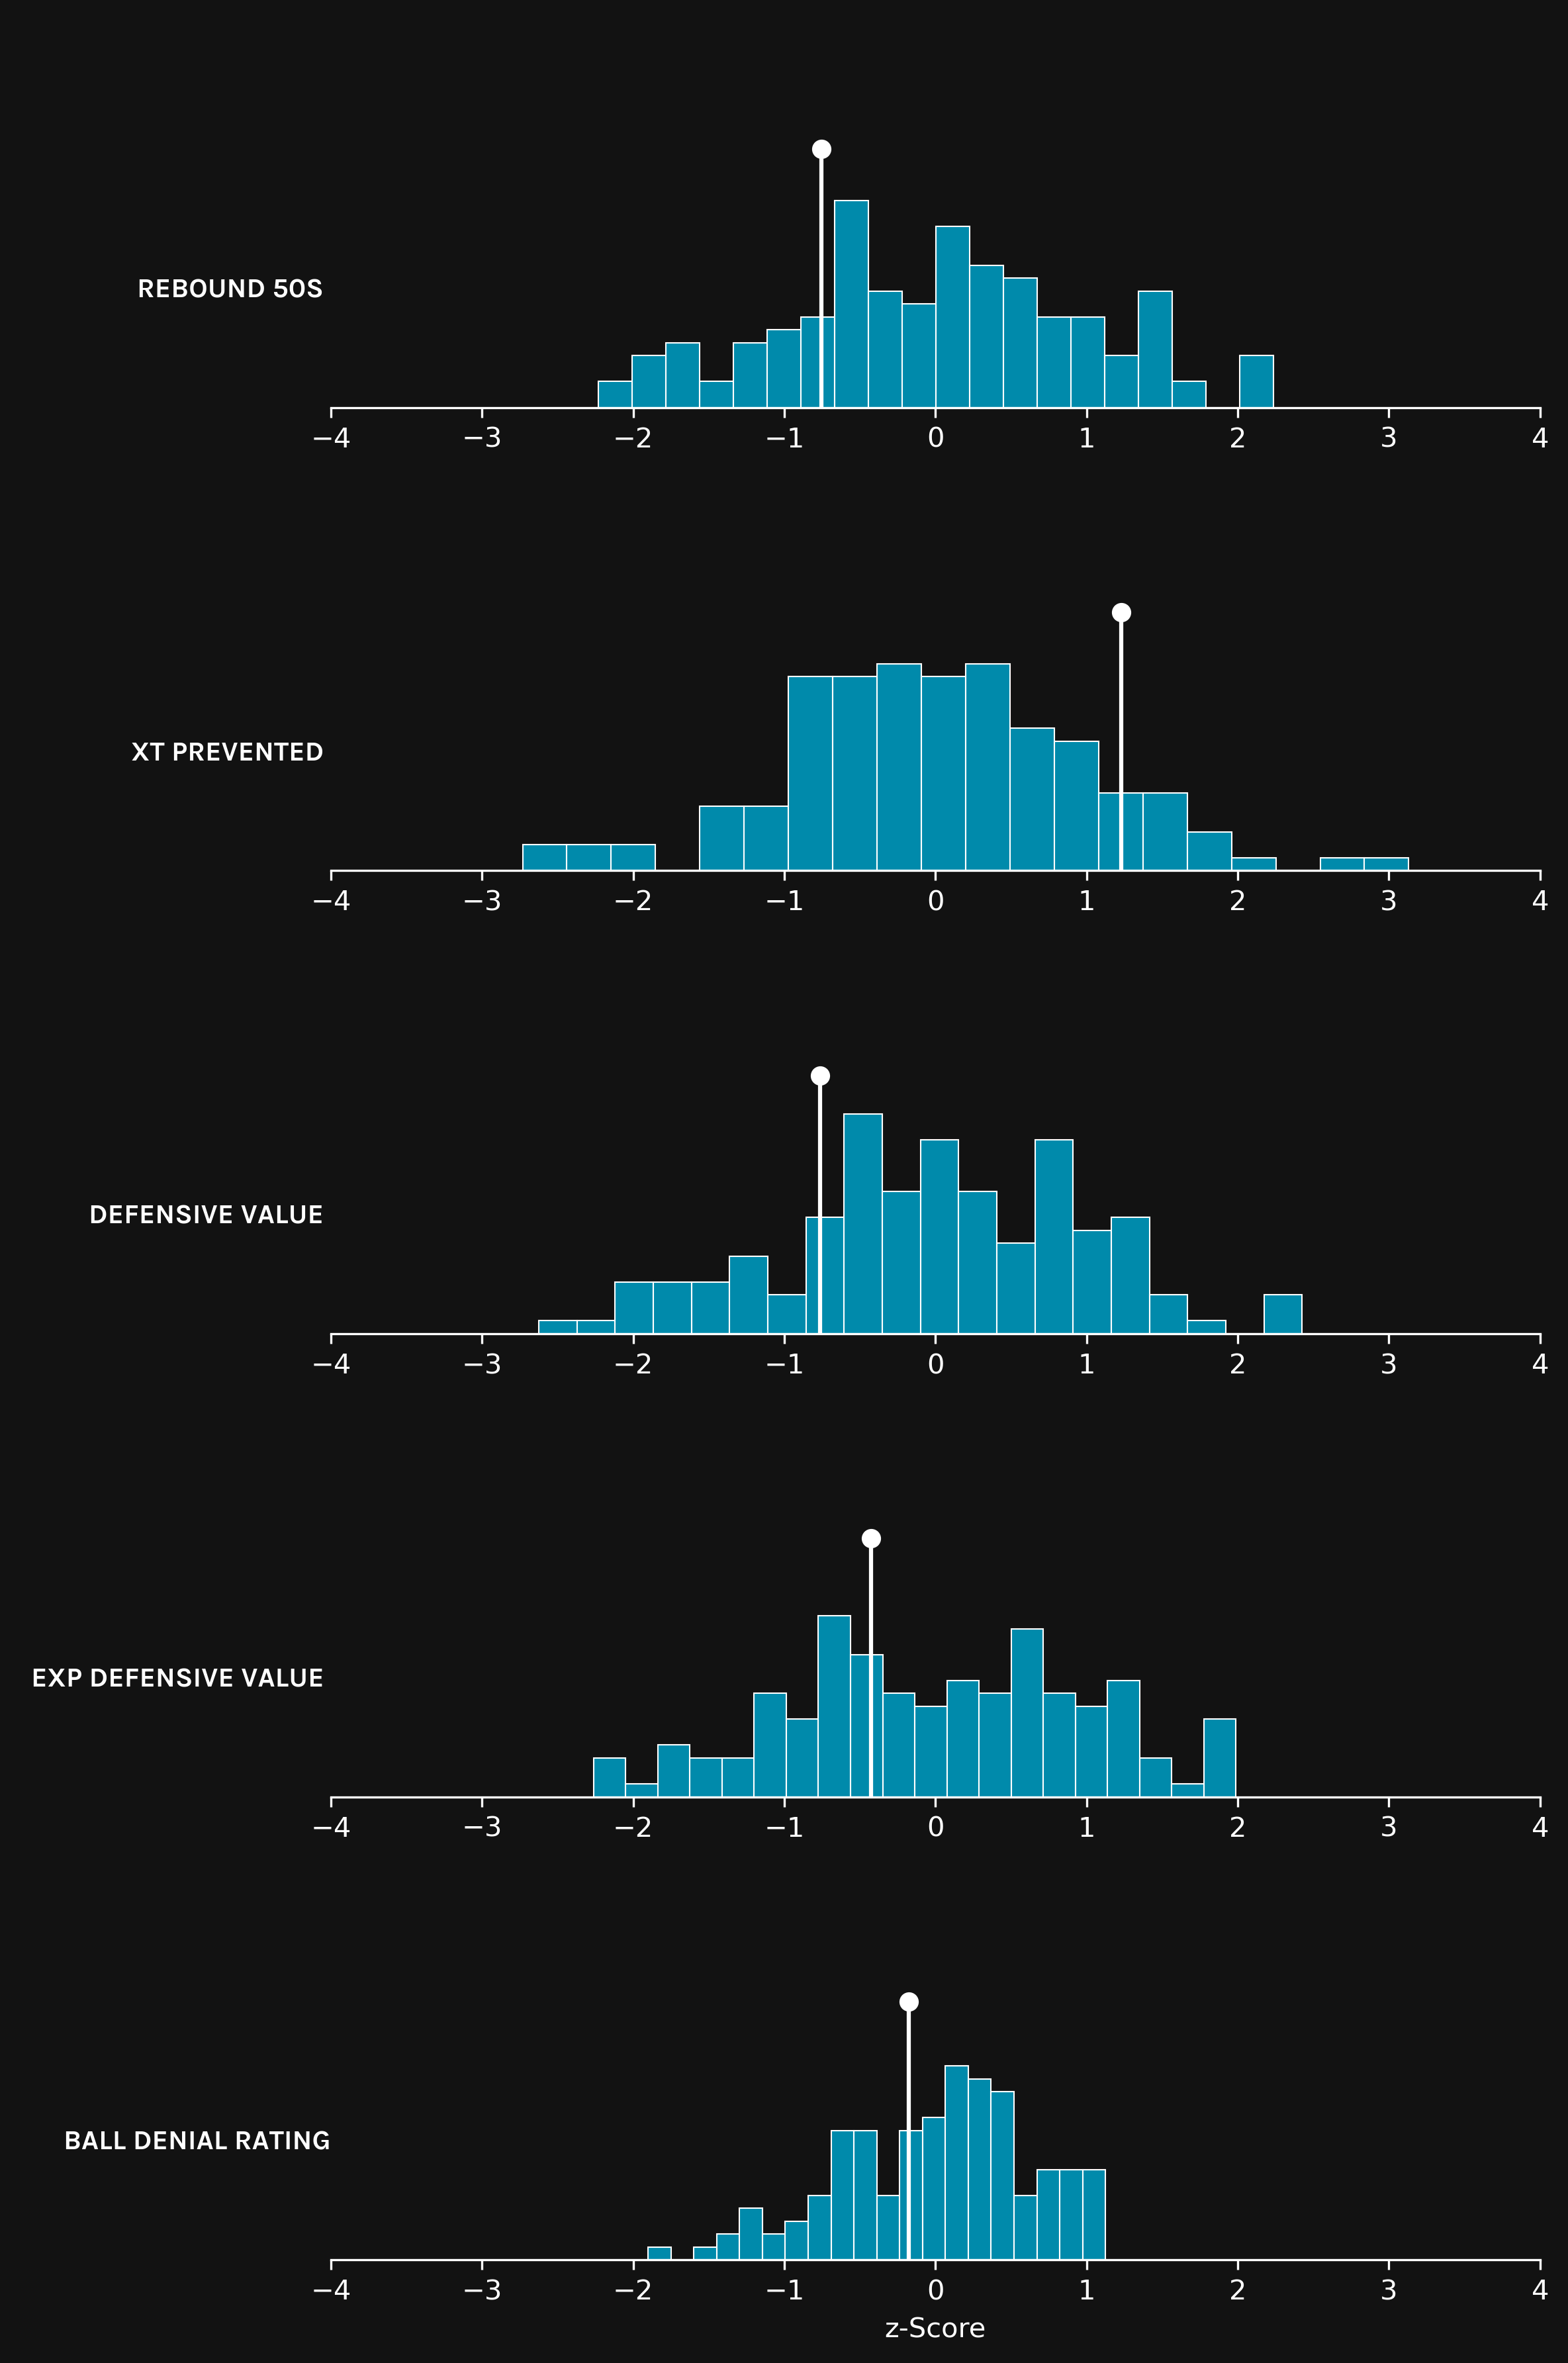

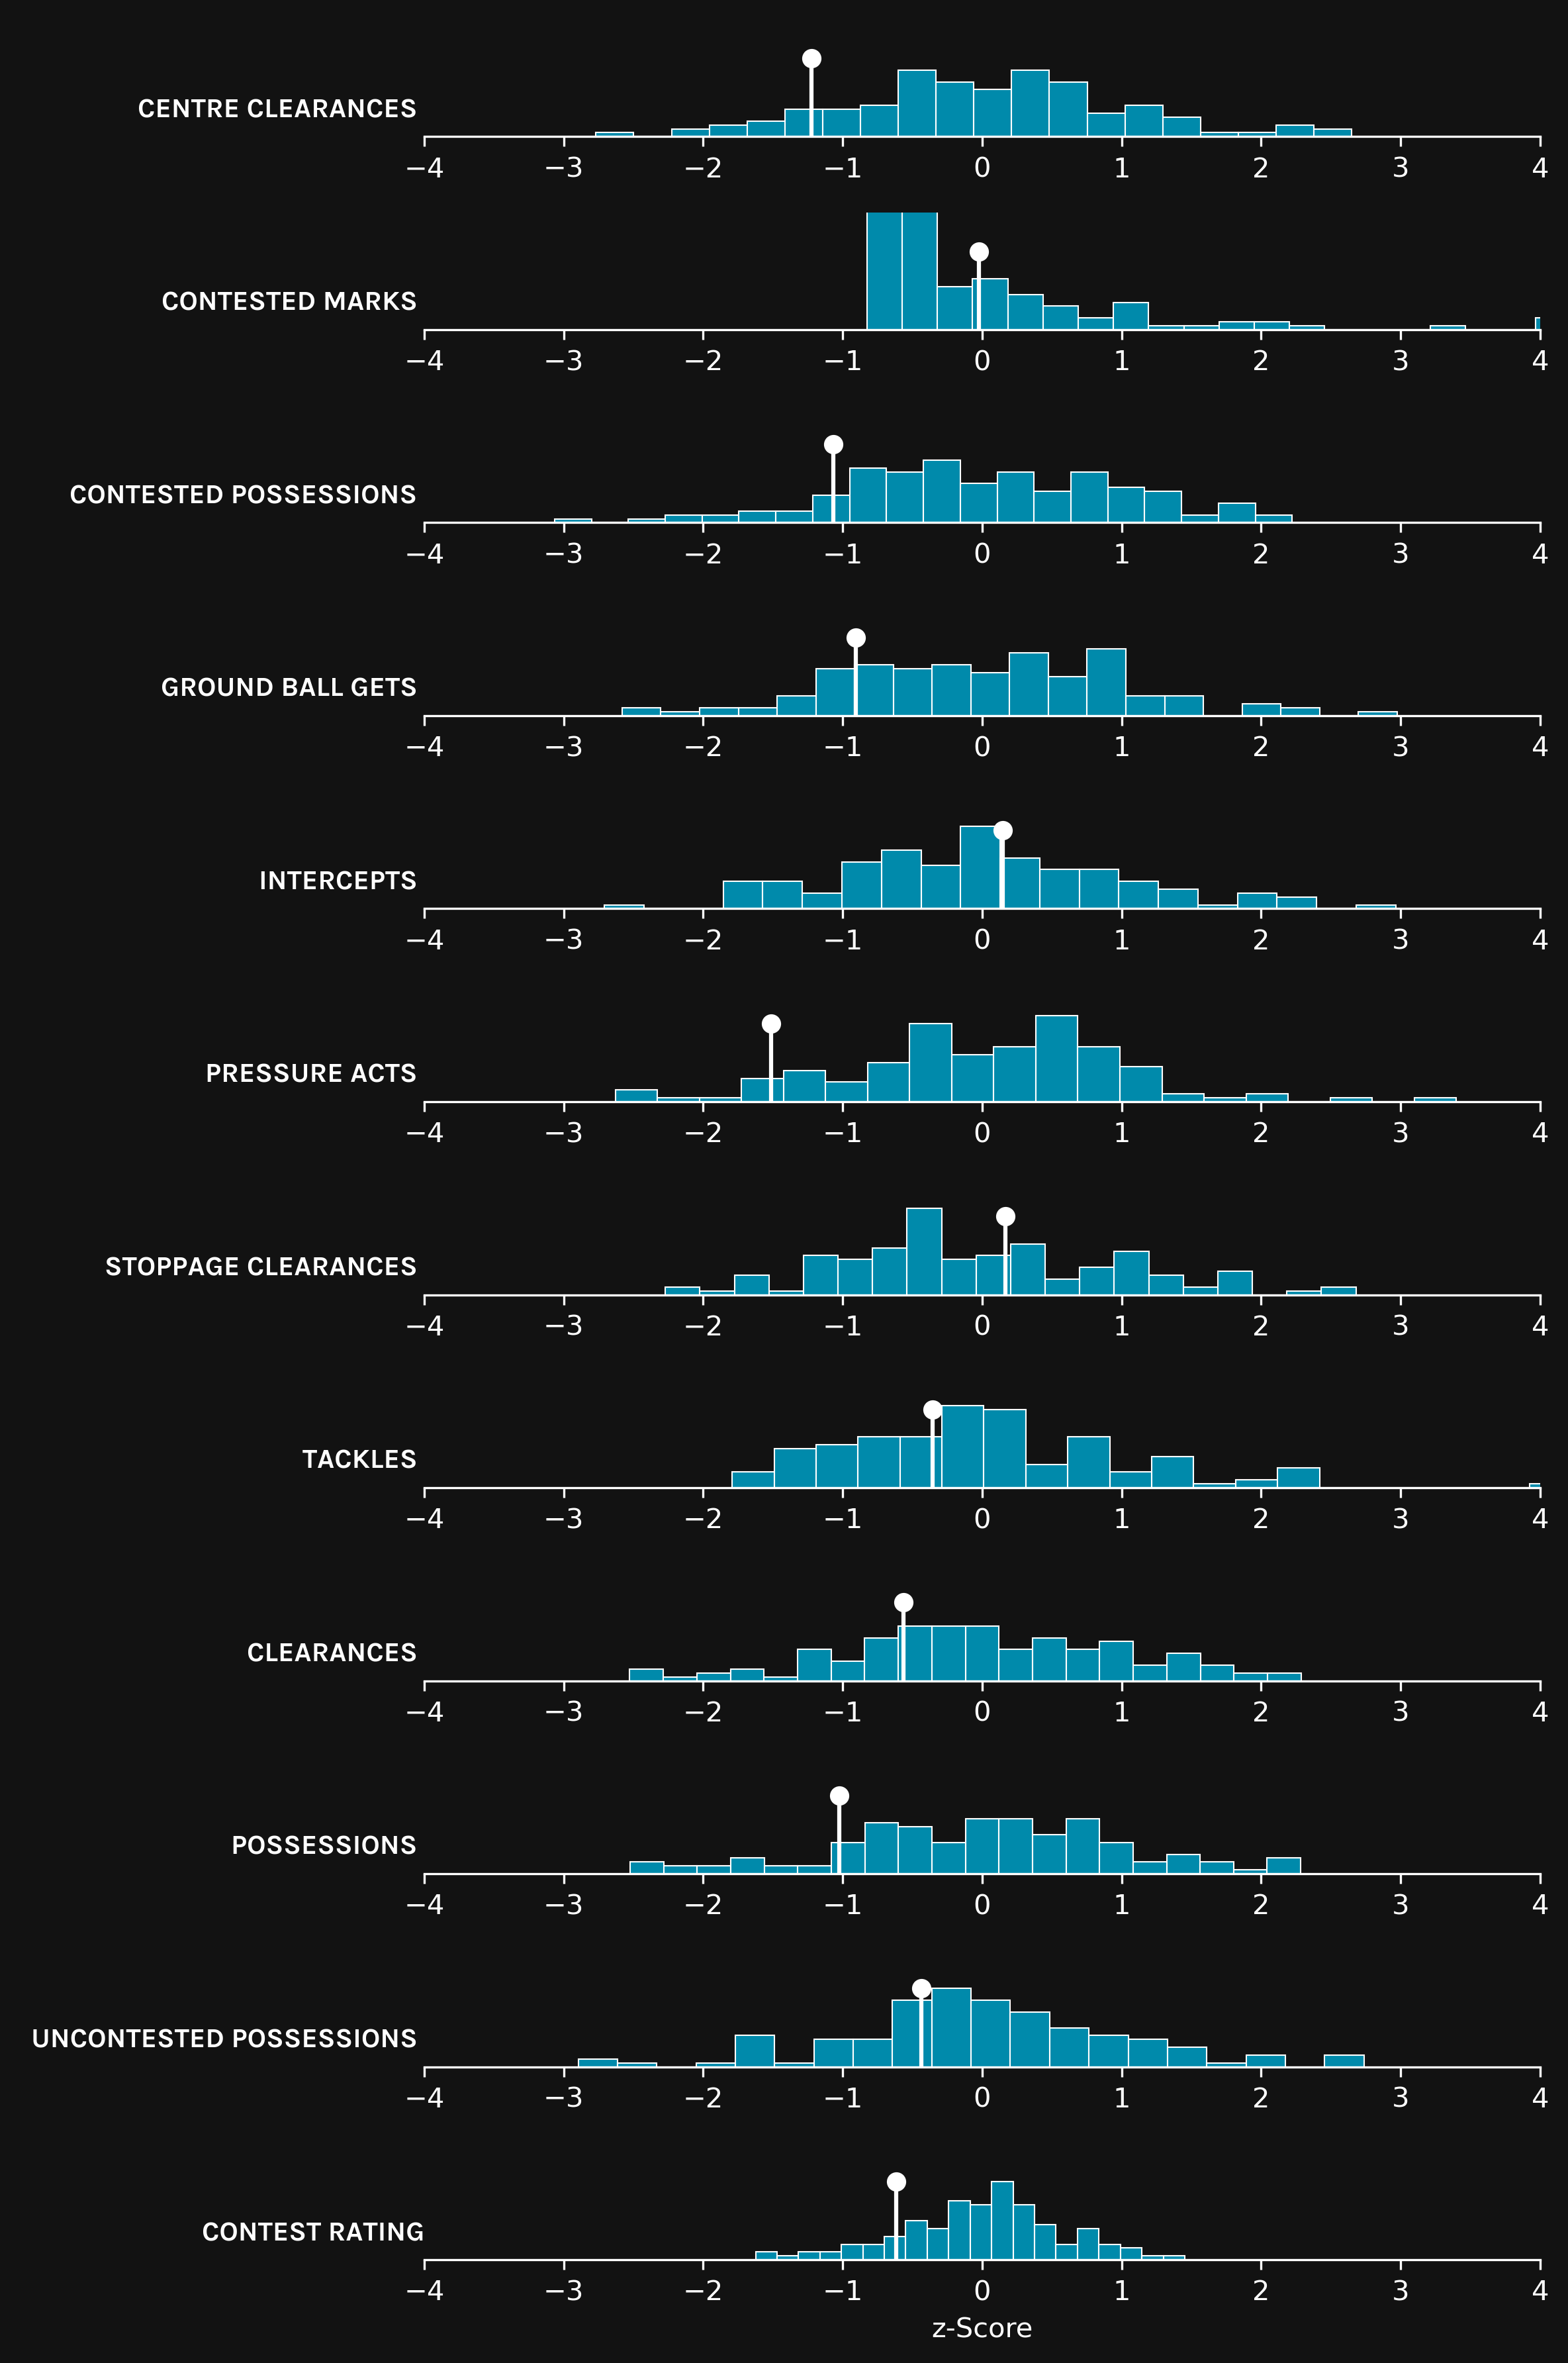

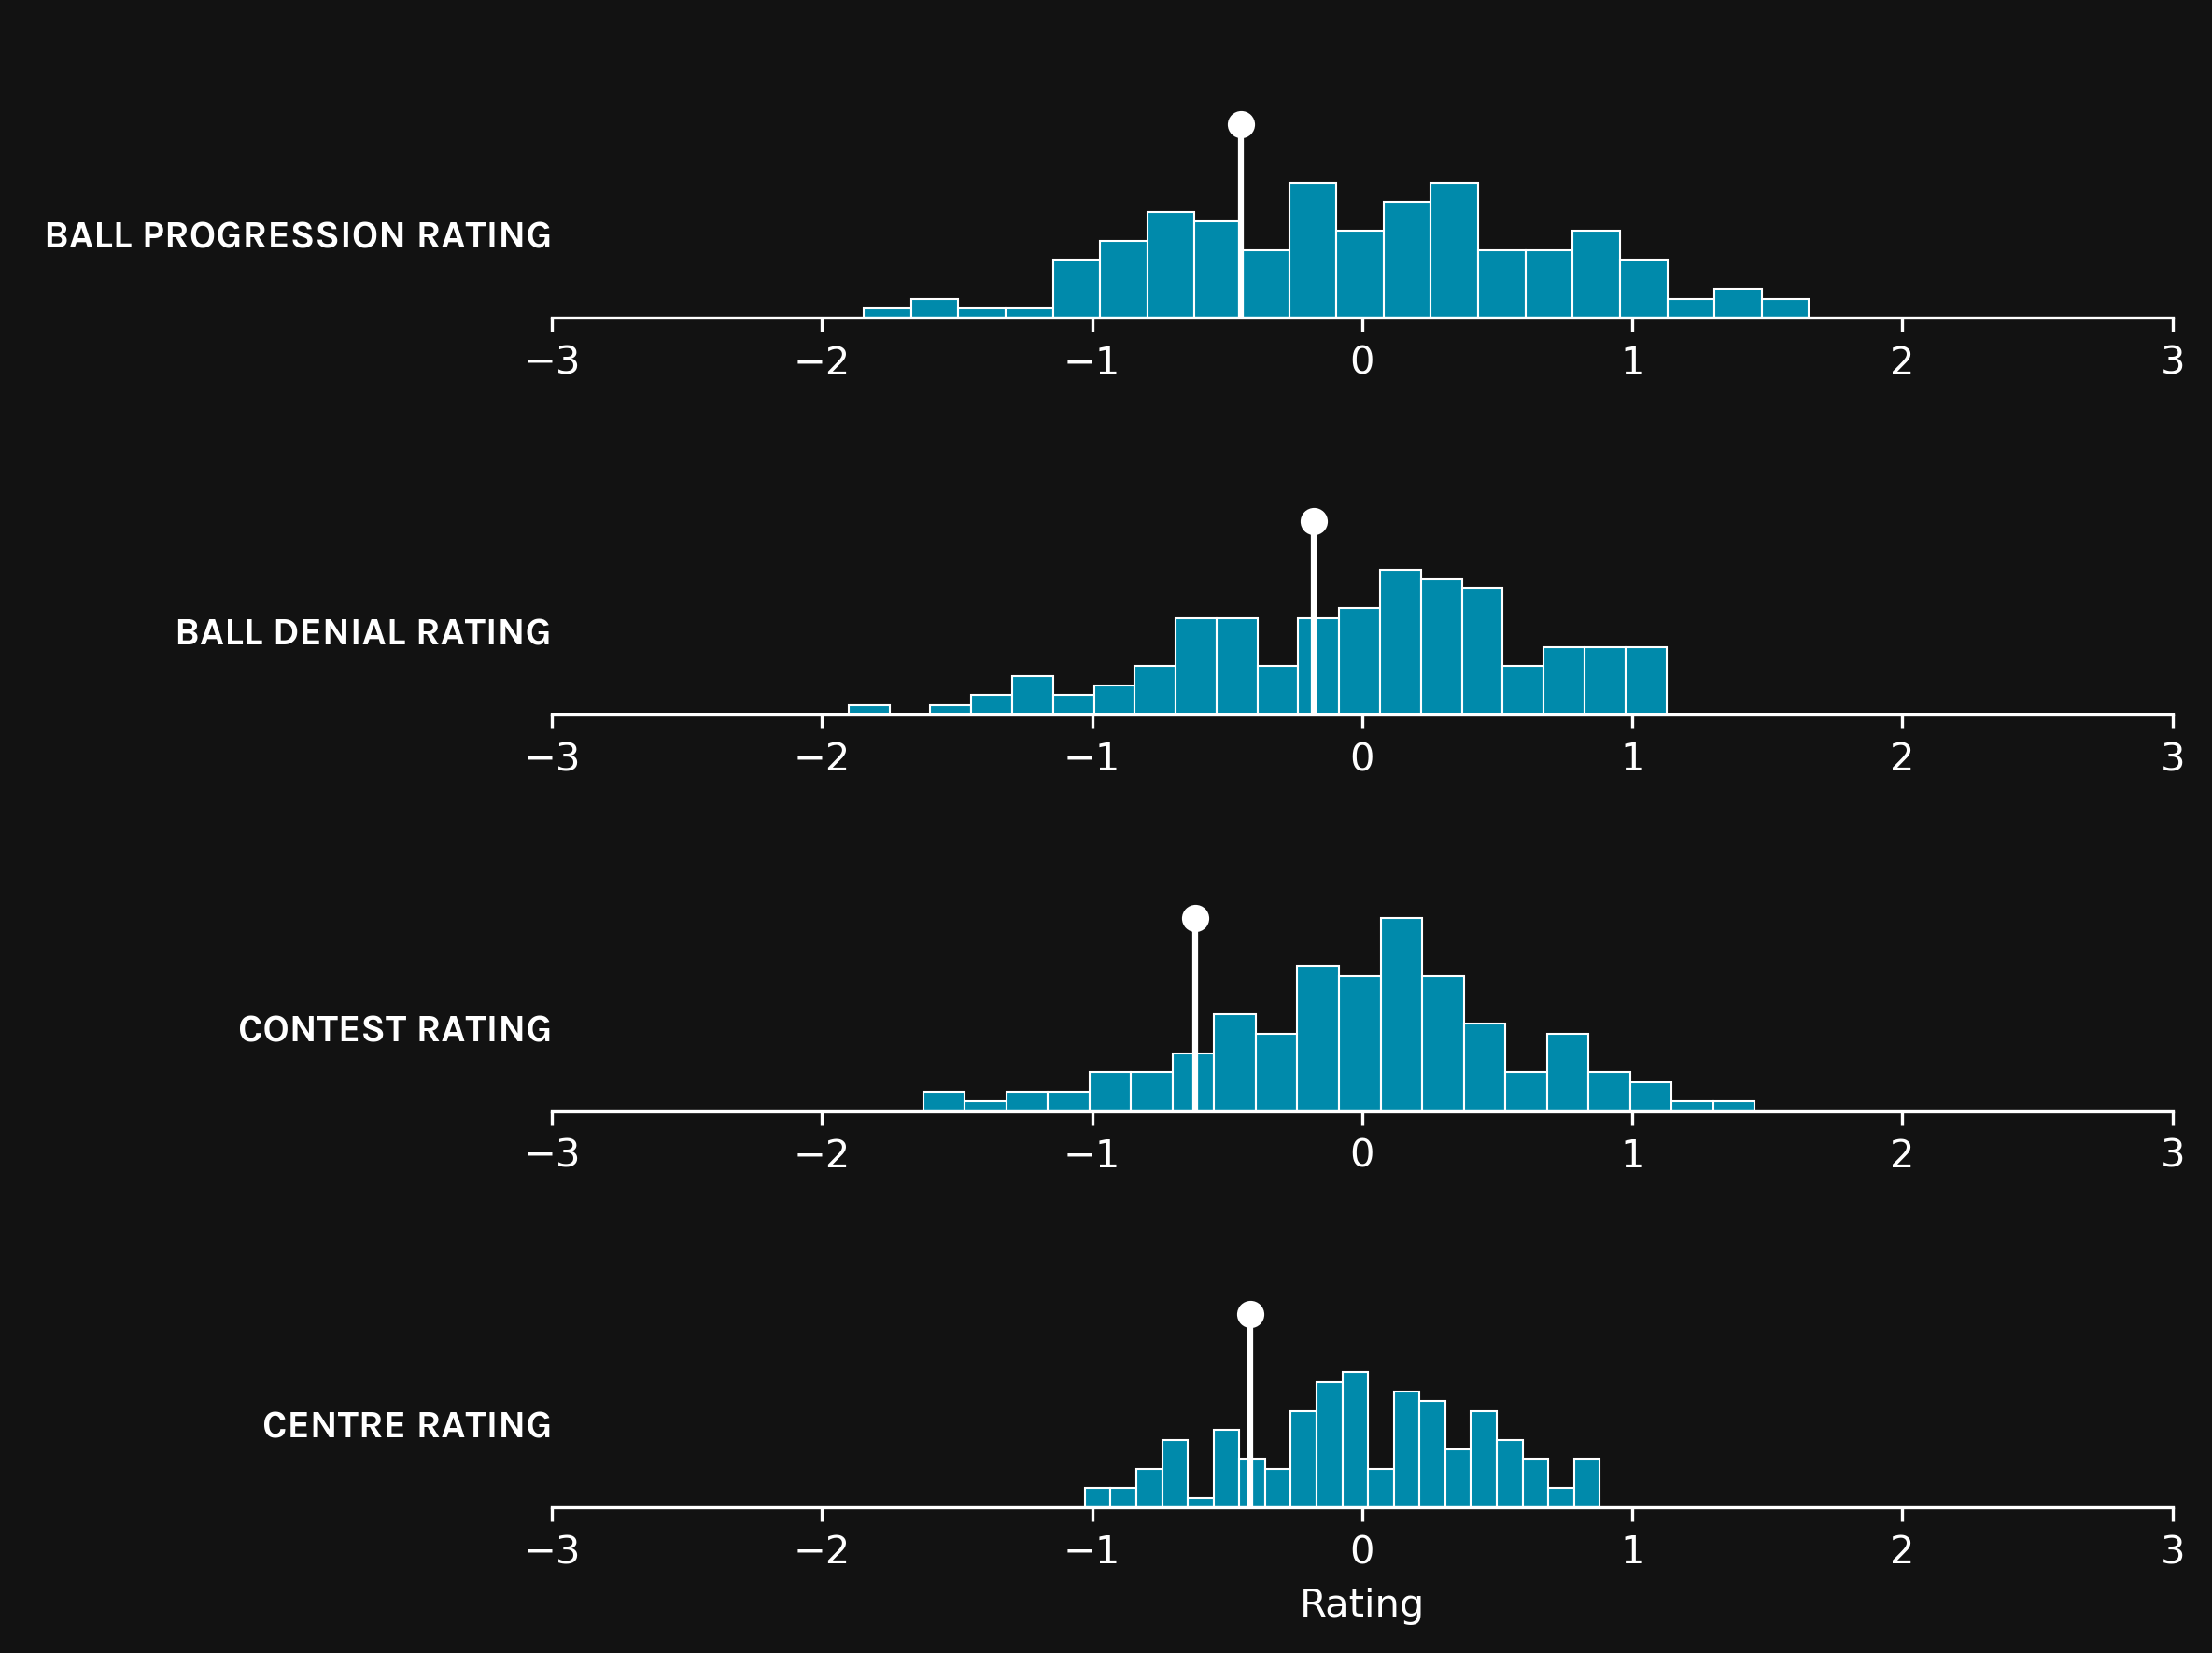

In [15]:
player = "Zak Butters"
team = "Port Adelaide"
season = 2022

for role in position_role_stats_zscaled.keys():
    stats = position_role_stats_zscaled[role] + [role+'_rating']
    fig, ax = player_stats_histograms(position_summary, player, team, season, stats)
    
stats = [x+"_rating" for x in list(position_role_stats_zscaled.keys())] + [selected_position_rating]
fig, ax = player_stats_histograms(position_summary, player, team, season, stats, figsize=(8, 6), xlim=3, xlabel = "Rating")
    